# EDA Notebook

## Import control

The imports have been broken up as to when they are used and in what segment of our exploratory analysis. 

In [1]:
#The basics really
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_colwidth = 1800
import os
import re, io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import chain
from itertools import combinations
from itertools import combinations_with_replacement
from pathlib import Path
import random



#Sentiment analysis
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

from sklearn.utils import shuffle
#Sklearn vectorization
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#wordclouds
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator




#play with plottly
import plotly.express as px


from fsplit.filesplit import Filesplit

import spacy

## Bringing in the files from the directory

In [2]:
#https://stackoverflow.com/questions/33912773/python-read-txt-files-into-a-dataframe/33912971
#original code uses chdir which means Change directories no need changed to list to get all my files
file_names = os.listdir('./kag/')
# Create Dictionary for File Name and Text
file_name_and_text = {}
for file in file_names:
    #UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 2907500: character maps to `<undefined> 
    #This means you need to change to a UTF- encoding`  
    with open('./kag/' + file, "r", encoding="utf8") as target_file:
    #This reads everything from the directory and aliases it as the the target file 
         file_name_and_text[file] = target_file.read()
df = (pd.DataFrame.from_dict(file_name_and_text, orient='index')
             .reset_index().rename(index = str, columns = {'index': 'file_name', 0: 'text'}))

We will essentially build from these two columns. Our meterics and analyis will revolve around these two sets of information

In [3]:
df.sample(2)

,file_name,text
29,Nas_lyrics.txt,"\nYeah, yeah\nAyo, Black, it's time, word (Word, it's time, man)\nIt's time, man (Aight, man, begin)\nYeah, straight out the fuckin' dungeons of rap\nWhere fake niggas don't make it back\nI don't know how to start this shit, yo... now\n\nRappers, I monkey flip 'em with the funky rhythm I be kickin'\nMusician inflictin' composition of pain\nI'm like Scarface sniffin' cocaine\nHoldin' an M16, see with the pen I'm extreme – now\nBullet holes left in my peepholes, I'm suited up in street clothes\nHand me a 9 and I'll defeat foes\nY'all know my steelo, with or without the airplay\nI keep some E&J, sittin' bent up in the stairway\nOr either on the corner bettin' Grants with the cee-lo champs\nLaughin' at baseheads tryna sell some broken amps\nG-packs get off quick, forever niggas talk shit\nReminiscin' about the last time the task force flipped\nNiggas be runnin' through the block shootin'\nTime to start the revolution, catch a body, head for Houston\nOnce they caught us off-guard, the MAC-10 was in the grass, and\nI ran like a cheetah, with thoughts of an assassin\nPicked the MAC up, told brothers ""Back up!"" — the MAC spit\nLead was hittin' niggas, one ran, I made him backflip\nHeard a few chicks scream, my arm shook, couldn't look\nGave another squeeze, heard it click ""Yo, my shit is stuck!""\nTry to cock it, it wouldn't shoot, now I'm in danger\nFinally pulled it back and saw\nThree bullets caught up in the chamber\nSo now I'm jettin' to the building lobby\nAnd it was full of children, prob'ly couldn't see as high as I be\n(So what you sayin'?) It's like the game ain't the same\nGot younger niggas pullin' the triggers, bringin' fame to their name\nAnd claim some corners, crews without guns are goners\nIn broad daylight, stick-up kids, they run up on us\n45's and gauges,..."
9,CunninLynguists_lyrics.txt,"\nLove ain't for the faint of heart\nStart training, this game is hard\nAnd arduous, you're gonna play in the dark, like when it rains in the park\nYou're hardly conscious of the stains and scars, enabling your partly clouded logic\nTo pay to impart bliss with arrangements of chocolates\nNow, you're working yourself out the same as when you strain' with a nautilus\nAnd you're willing to embrace pain facing sustained negative consequence\nIf nothing you say when in love is embedded with common sense\nThen, do you really regret when you've shredded your promises?\nNow, I've tested the waters, kid. Sipped it; rippled the pond a bit\nVisits have been abolished, and this shit's killing my confidence\nIs this filling your conscience when distance is an accomplishment?\nIf you miss chicks when they're around, the phrase ""Let's quit"" isn't an option\nYou best fix whatever's wrong and just move on and get on with it\nCause, You'll catch bigger fish in the sea if you manage not to drown in it\nIt's sad, but proud or not, most your standards go down a notch\nWhen loneliness drinks at the bar you set too high\nCause, It isn't really my time, is it? Shit, I just found the watch\nBut hearing the bell toll for me twice a day, has me fearing my grandfather clock\nAnd I can't die without trying, my hands tied in knots\nKnowing that I'll never learn to brave the waves if I stand by the docks\nLove is hampered by thought, if you can handle the prospect of\nDeath - it's as massive a shock\nAnd to intellects, it's a fuckin' smack in the crotch\nIt's a cancer that rots your soul, tosses demons off of the road\nJust use caution and know, that, love ain't nothing but a loss of control\nOff then, we go\n\nTraces of love, long ago\nThat didn't work out\nTraces of love, long ago\nThat didn't ..."


We use the file name to create identifiers. Fusion is a test set we can drop it since we will use our train test split.

In [4]:
df['artist'] = [x.split('_')[0] for x in df['file_name']]
df.drop(columns='file_name',inplace=True)
df['artist'] = df.artist.str.replace(r"fusion.txt",'fusion',regex=True)
df['artist'] = df.artist.str.replace(r"Joey Baa",'Joey Badass',regex=True)

In [5]:
df=df.reindex(['artist','text'], axis="columns")

In [6]:
df.sample(2)

,artist,text
4,Bas,"\nDo you still believe in love?\nOr do you like drugs?\n\nRan into a night owl rollin' White Owls\nGirl it's been awhile since I hit a White Owl\nI'm with it though, she a centerfold\nBig ol' blunt look like tentacles\nShe strip in Europe, Interpol\nDon't remember her in her clothes\nI fucked her friend, damn they was close\nLet's reunite, let's get em close\nHit 'em twice in a row, hit a flight, and I'm ghost\nThat's the last time I seen her though\nShe be gettin' too eager, ho\nStamp it like it's my visa\nCheefin' off of these berries\nWhen the world gets heavy and it hurts to carry\nI'm her Midnight Mercenary, Fiend\n\nIt's lit, feel the buzz?\nThat's a half? Shit it was\nIt's lit, feel the buzz?\nIt's lit, feel the buzz?\n\nShe take me to a place that I never would discover\nMight never have another, so I had to fuck her\nReach into my pockets, damn I ain't got a rubber\nSee my nigga Ron like L. Ron Hubbard, he be outta space\nSay he got a case of straps at the back of the hotel cupboard\nRoom 508, check by the safe, she say ""Boy you got it made\nDo you got a cape?"", I ain't with the games ma, do I gotta wait?\nI'm quite impatient, intoxication got me feelin' like procreating\nGirl I'm the baker, you surely caking\nStand back, catch my amazing graces\nPhoto finish and fornication\nPhoto finish and fornication, fiend\n\nIt's lit, feel the buzz?\nThat's a half? Shit it was\nIt's lit, feel the buzz?\nIt's lit, feel the buzz?\n\nFeel the buzz\nCan you feel the buzz?\nFeel the buzz, ohh-whoa, yeah\nDo you believe in love?\nWhat's your drug? What's your drug?\nOhh-whoa\n\nTake it all the way from the beginning\nYea, yea, yea\nNow comes the question of which intro do you use?\nDo you use this intro or the other intro I was talkin' on?\nBut, then that lets people know I..."
15,fusion,"\nChickens in the sink\nCrack on the stove\nTriple beam for the weight\nCut the middle man tryna get 8 white bitches\nSnorting off the plate coke from Colombia\nRiding round in the Benz looking like a trap star\nFlipping raw day and night\nTryna get my money right naw I ain't living rite\nFucking bitches all night kick 'em out the next day\nEveryday is pay day\nHit me with a half bring it back in two days\nLiving in Cali by the ocean\nCondo got em open\nLong dick stroke em\nI send 'em to the husband he over there fussing\nI'm over here fucking no loving\nPuffing on heavenly rock star 70's\nSlim pants ripped jeans Jeremy Scott wings\nFucking heavily counting up cream\nRolling on beans disobedient with trees\nTatted from neck to ear bitches they want to stare\nMacking with hoes as I pose\nHand in my draws henny out my pores\nAs I pour hit the blunt too much you on the dash as I pass\n(Hook)\nCoke and White Bitches\nCoke and White Bitches\nJust Coke and White Bitches\nCoke and White Bitches\nCoke and White Bitches\nJust Coke and White Bitches\nCoke and White Bitches\nCoke and White Bitches\n\nDifferent money different days\nOn my hip I got that cake\nClose your mouth if it ain't about 'cane\nOver the stove mixing\nHitting swishers\nRed paint tripping, blue seat sack tripping\nCoke I hold tripping\nI'm pimping hat tilting\nNo limping fuck sipping\nI'm shitting on you niggas\nSeven figures go figure\nSurrounded by white bitches\nSlipping off wedding rings\nShe do her one two thing\nCali with the pool in the back\nGot these niggas backs\nMeet me by the border ounce to a key\nFlying over seas\nKorean imported extorted these niggas\nSmoking out the bong\nLighting up the spliff Basel on my wrist\nBought me a six pop the willy on that bitch\nShe snorting off my dick put her o..."


In [7]:
df.drop(df.loc[df['artist']=='fusion'].index, inplace=True)

Now we will split the rows on text markers. First on the double line break. This will give us the verses and then on the single line break. The final break produces a line which would be half a bar. Here is an example:

"My name is mongo; I live in the jungle."

When we break we are putting "My name is Mongo" and "I live in the Jungle" on two differnt 

**So each line is half a bar in theory.** 

In [8]:
df=(df.set_index(['artist'])
       .apply(lambda x: x.str.split('\n\n').explode())
       .reset_index())

In [9]:
df=(df.set_index(['artist'])
       .apply(lambda x: x.str.split('\n').explode())
       .reset_index())

In [10]:
df.shape

(150172, 2)

We will check for nulls and then proceed to drop duplicates that will most likely clear out redundancy 

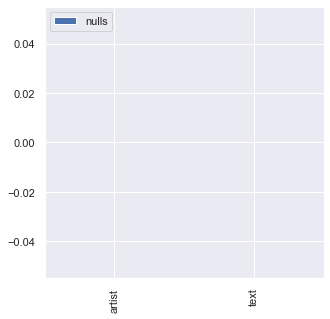

In [11]:
df.isnull().sum().plot(kind='bar',figsize=(5, 5), label="nulls");
plt.legend(loc="upper left");
#will visualize the Naned rows in text

In [12]:
df.dropna(inplace=True)
#remove them and proceed to seek dupes

In [13]:
df.text.drop_duplicates(inplace=True)
df.shape
#shed some rows

(150172, 2)

Let us start scrubbing the text...

First we are going to change out some of the specail charecters and occurrence of specail charecters integrated into names.
Secondly we will strip all specail charecters and tabs, returns and next lines.
Thirdly we will look for blank lines of white space and convert them into Numpy Nans

And then do another drop.

In [14]:
df['text'] = df.text.str.replace(r"'",'',regex=True)
df['text'] = df.text.str.replace(r"A$AP",'ASAP',regex=True)
df['text'] = df.text.str.replace(r"Jay-Z",'JayZ',regex=True)
df['text'] = df.text.str.replace(r"Pusha-T",'PushaT',regex=True)

In [15]:
df['text'] = df.text.str.replace(r'[^a-zA-Z ]\s?',' ',regex=True)
#Since we are looking to tokenize words we will remove all special charecters and digits
df.replace('/(\r\n)+|\r+|\n+|\t+/', ' ', regex=True, inplace=True)
#kill the line breaks and tabs
df.shape

(150172, 2)

In [16]:
df.sample(2)

,artist,text
80078,Kanye West,I know that we the new slaves
66189,J Cole,I aint never did this before no


In [17]:
df.replace("", np.nan, inplace=True)
df.replace('  ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)
df.replace('   ', np.nan, inplace=True)
df.replace('    ', np.nan, inplace=True)
df.replace('     ', np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(149791, 2)

In [18]:
df.sample(1).describe()

,artist,text
count,1,1
unique,1,1
top,J Cole,Am I wrong let them know
freq,1,1


**Our data is now clean and ready to be processed.**
Lets check and see how many rows we have.

In [19]:
df.shape

(149791, 2)

## Creating Lexicon Analysis

First let us get the length of charecters and the number of words used to compose of the half of a bar. 
This will be our first engineered features.
We will also drop anything with less than 25 charecters.
Our third set will relate to reoccuring words.
Unfortunetly, the largest segment of words that occur in the lyrics are profanity. So in order to isolate them we need to build a list or dictionary.

In [20]:
df['length']=df['text'].str.len()
df['number_words'] = df['text'].str.split().str.len()
df = df[df.length > 25]
df.shape

(124937, 4)

While this seems medievel and bit drawn out sometimes it helps to write things out one at a time so that this way you can reflect on an element of a list and how it relates to the entire list.

In [21]:
df.text.str.lower()
number_explatives=(
#shit
df[df.text.str.contains(r'shit')].shape[0]+
df[df.text.str.contains(r'shits')].shape[0]+
df[df.text.str.contains(r'shitty')].shape[0]+
df[df.text.str.contains(r'bullshit')].shape[0]+
df[df.text.str.contains(r'shi')].shape[0]+
df[df.text.str.contains(r'shitty')].shape[0]+

#explicit_grouptwo    
df[df.text.str.contains(r'fuck')].shape[0]+
df[df.text.str.contains(r'fck')].shape[0]+
df[df.text.str.contains(r'fk')].shape[0]+
df[df.text.str.contains(r'fuckin')].shape[0]+                   
df[df.text.str.contains(r'fucking')].shape[0]+
df[df.text.str.contains(r'fawk')].shape[0]+
df[df.text.str.contains(r'fawkin')].shape[0]+
df[df.text.str.contains(r'fawks')].shape[0]+
df[df.text.str.contains(r'fawking')].shape[0]+
df[df.text.str.contains(r'fucked')].shape[0]+
df[df.text.str.contains(r'fucker')].shape[0]+
    
#bitch                   
df[df.text.str.contains(r'bitch')].shape[0]+
df[df.text.str.contains(r'bitches')].shape[0]+
df[df.text.str.contains(r'bich')].shape[0]+
df[df.text.str.contains(r'biches')].shape[0]+
df[df.text.str.contains(r'bitchez')].shape[0]+
df[df.text.str.contains(r'bitchz')].shape[0]+
df[df.text.str.contains(r'bitchass')].shape[0]+
df[df.text.str.contains(r'bitch-ass')].shape[0]+
    
#explicit_grouptwo 
df[df.text.str.contains(r'mother-fucker')].shape[0]+
df[df.text.str.contains(r'mother-fuckers')].shape[0]+
df[df.text.str.contains(r'motherfucker')].shape[0]+
df[df.text.str.contains(r'motherfuckers')].shape[0]+
df[df.text.str.contains(r'motherfucka')].shape[0]+
df[df.text.str.contains(r'motherfuckas')].shape[0]+
df[df.text.str.contains(r'muthafucka')].shape[0]+
df[df.text.str.contains(r'muthafuckas')].shape[0]+
df[df.text.str.contains(r'muthafuckaz')].shape[0]+
df[df.text.str.contains(r'motherfuckin')].shape[0]+
df[df.text.str.contains(r'muthafuckin')].shape[0]+
df[df.text.str.contains(r'mother fucker')].shape[0]+
df[df.text.str.contains(r'mother fuckers')].shape[0]+
df[df.text.str.contains(r'mother fucka')].shape[0]+
df[df.text.str.contains(r'mother fuckas')].shape[0]+
df[df.text.str.contains(r'mutha fucka')].shape[0]+
df[df.text.str.contains(r'mutha fuckas')].shape[0]+
df[df.text.str.contains(r'mutha fuckaz')].shape[0]+
df[df.text.str.contains(r'mother fuckin')].shape[0]+
df[df.text.str.contains(r'mutha fuckin')].shape[0]+
df[df.text.str.contains(r'mothafuckas')].shape[0]+
df[df.text.str.contains(r'mothafucka')].shape[0]+
    
    
#anatomy   
df[df.text.str.contains(r'dick')].shape[0]+
df[df.text.str.contains(r'dicks')].shape[0]+
df[df.text.str.contains(r'cock')].shape[0]+
df[df.text.str.contains(r'cocks')].shape[0]+
df[df.text.str.contains(r'pussy')].shape[0]+
df[df.text.str.contains(r'cunt')].shape[0]+
df[df.text.str.contains(r'cunts')].shape[0]+

#group_two    
df[df.text.str.contains(r'nigga')].shape[0]+
df[df.text.str.contains(r'niggas')].shape[0]+
df[df.text.str.contains(r'niggaz')].shape[0]+
df[df.text.str.contains(r'nikka')].shape[0]+    
df[df.text.str.contains(r'nikkas')].shape[0]+
df[df.text.str.contains(r'niggah')].shape[0]+
df[df.text.str.contains(r'niggahs')].shape[0]+
    
    
#profanity towards promiscuity    
df[df.text.str.contains(r'whore')].shape[0]+
df[df.text.str.contains(r'whores')].shape[0]+
df[df.text.str.contains(r'hoe')].shape[0]+
df[df.text.str.contains(r'hoes')].shape[0]+    
df[df.text.str.contains(r'hoez')].shape[0]+

#the buttocks
df[df.text.str.contains(r'assez')].shape[0]+
df[df.text.str.contains(r'asses')].shape[0]+
df[df.text.str.contains(r'ass')].shape[0]+
df[df.text.str.contains(r'asshole')].shape[0]+
df[df.text.str.contains(r'azz')].shape[0])

print(f"The number of {number_explatives} expletives and the total number of words in the corpus is {df.number_words.sum()}")

The number of 48317 expletives and the total number of words in the corpus is 1152881


In [22]:
percentage_of_corpus=round(number_explatives/df.number_words.sum(),4)

print(f"{percentage_of_corpus*100}% are expletives")

4.19% are expletives


Now lets make the lists

In [23]:
#the complete list
expl_list=['shit','shits','shitty','bullshit','shi','fuck','fck','fk','fuckin','fucking','fawk','fawkin','fawks',
           'fawking','bitch','bitches','bich','biches','bitchez','bitchz','bitchass','bitch-ass','mother-fucker',
           'mother-fuckers','motherfucker','motherfuckers','motherfucka','motherfuckas','muthafucka','muthafuckas',
           'muthafuckaz','motherfuckin','muthafuckin','mothafucka','mothafuckas','dick','dicks','cock','cocks','pussy','cunt','cunts','nigga',
           'niggas','niggaz','nikka','nikkas','niggah','niggahs','nigerina','whore','whores','hoe','hoes','hoez','assez','asses',
           'ass','asshole','azz']
# the first set of profanity used 
grp_one=['fucked','fucker','fuck','fck','fuckin','fucking','fawk','fawkin','fawks',
        'fawking','mother-fucker','mother-fuckers','mother fucker','mother fuckers','mother fucka',
         'mother fuckas','mutha fucka','mutha fuckas','mutha fuckaz','mother fuckin','mutha fuckin','mother fucker',
         'mother fuckers','mother fucka','mother fuckas','mutha fucka','mutha fuckas','mutha fuckaz','mother fuckin','mutha fuckin','mothafuckas','mothafucka']
# the second largest of profanity used
grp_two=['nigga','niggas','niggaz','nikka','nikkas','niggah','niggahs']

In [24]:
df.sample(2)

,artist,text,length,number_words
73045,Jay-z,Thats right its wicked thats life I live it,44,9
111269,Montana of 300,Ambitious as Ive ever been,26,5


In [25]:
df['expl_bool']=df[['text']].apply(lambda x : x.str.contains('|'.join(expl_list)).sum(),axis=1)

In [26]:
df['total_expl'] = df['text'].str.count(r'\b|\b'.join(expl_list))
df['grp_1'] = df['text'].str.count(r'\b|\b'.join(grp_one))
df['grp_2'] = df['text'].str.count(r'\b|\b'.join(grp_two))

Now we have some additional features that relate to the usage of profanity 

total_expl= the number total amount of profane words

grp_1= the largest explitive used

grp_2= the second to largest group

expl_bool= jsut an indicator of profanity in a boolean sense

In [27]:
df.sample(2)

,artist,text,length,number_words,expl_bool,total_expl,grp_1,grp_2
70956,Jay-z,Blow a stack for your niggas with your trapping ass,51,10,1,2,0,1
120247,NF,You spend your life in a dream that you cant escape,51,11,0,0,0,0


Now lets visualize what it looks like compare these word groups compared to the entire corpus. 

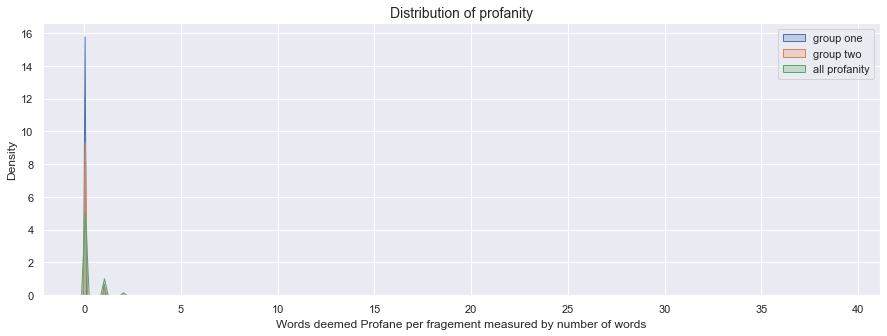

In [111]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['grp_1'], label='group one', shade=True);
sns.kdeplot(df['grp_2'], label='group two', shade=True);
sns.kdeplot(df['total_expl'], label='all profanity', shade=True);
plt.legend(loc="upper right");
plt.xlabel('Words deemed Profane per fragement measured by number of words');
plt.title("Distribution of profanity", fontsize=14);

So that is what the roughly 4% looks like in the bigger scheme of things. This means that the diversity of the words transcribed is a lot larger than we would have thought. 

## Introduction of Sentiment.

Our next feature to be integrated in is polarity and subjectivity. 

These scores relate to the positve and negative designation of the bar fragment and the subjective/objective nature of the statment. 

Let us see how they relate.

In [29]:
def poles(text):
    try:
        return TextBlob(text).polarity
    except:
        return None
def subj(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None
#calls in each seperately for direct use alternatively you could get 
#it in a tuple but getting both values in the column is going to be annoying. 
    
    
    
df['tb_polarity'] = df['text'].apply(poles)
df['tb_subjectivity'] = df['text'].apply(subj)

df.sample(2)

,artist,text,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity
48695,Eminem,They first were divorced throwin her over furniture Agh,58,9,0,0,0,0,0.25,0.333333
143984,the notorious big,Watch Im telling you when my man get on its gonna be some shit we aint gonna have to sell this shit no mo,106,24,1,2,0,0,-0.20,0.800000


We can also bring in Vader. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the MIT License.

In [30]:
analyzer = SentimentIntensityAnalyzer()
df['vader'] = df['text'].apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['vader'], axis=1), df['vader'].apply(pd.Series)], axis=1)

In [31]:
df.sample(2)

,artist,text,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,neg,neu,pos,compound
62237,Immortal Technique,A movement a sonic war motherfucka you sleepin,47,8,1,1,0,0,0.0,0.0,0.358,0.642,0.0,-0.5994
59069,Immortal Technique,And so he met them Friday night at a quarter to three,53,12,0,0,0,0,0.0,0.0,0.000,1.000,0.0,0.0000


Now let us see if there is any correlation between these features and explitives.

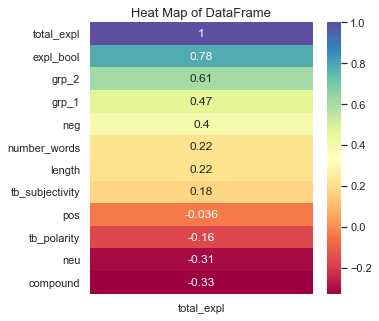

In [32]:
plt.figure(figsize=(5, 5))
plt.fontsize = 32
sns.heatmap(df.corr()[['total_expl']].sort_values('total_expl', ascending=False), 
            annot=True, cmap='Spectral', vmax=1);
plt.title("Heat Map of DataFrame", fontsize=13);

Lets visualize the the relationship between textblobs subjectivity and profanity

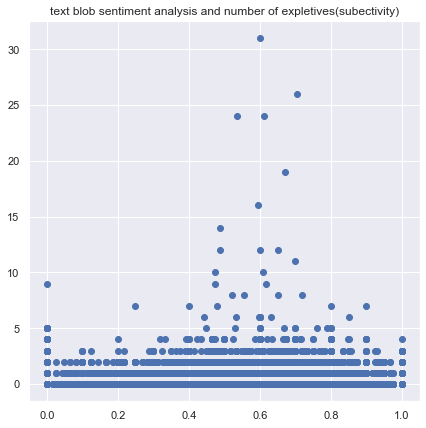

In [33]:
plt.figure(figsize=(7,7));
plt.scatter(x=df['tb_subjectivity'], y=df['total_expl']);
plt.title("text blob sentiment analysis and number of expletives(subectivity)", fontsize=12);

Lets visualize the the relationship between textblobs subjectivity and profanity

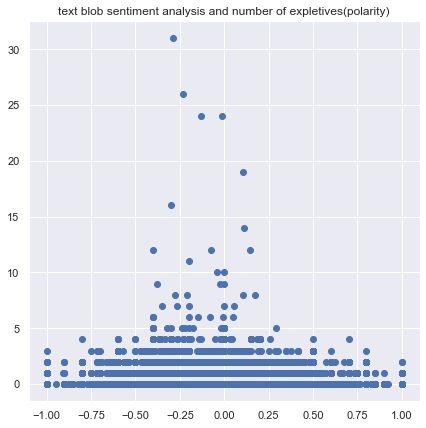

In [34]:
plt.figure(figsize=(7,7));
plt.scatter(x=df['tb_polarity'], y=df['total_expl']);
plt.title("text blob sentiment analysis and number of expletives(polarity)", fontsize=12);

Lets visualize the the relationship between textblobs polarity and profanity group 1

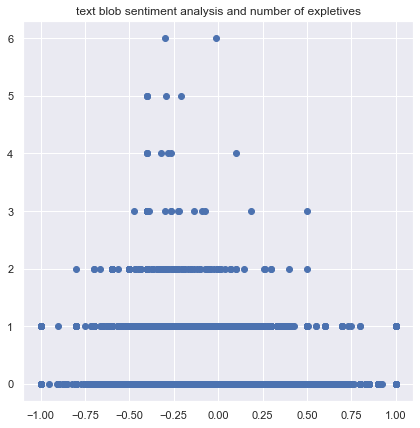

In [35]:
plt.figure(figsize=(7,7));
plt.scatter(x=df['tb_polarity'], y=df['grp_1']);
plt.title("text blob sentiment analysis and number of expletives", fontsize=12);

Lets visualize the the relationship between textblobs polarity and profanity group 2

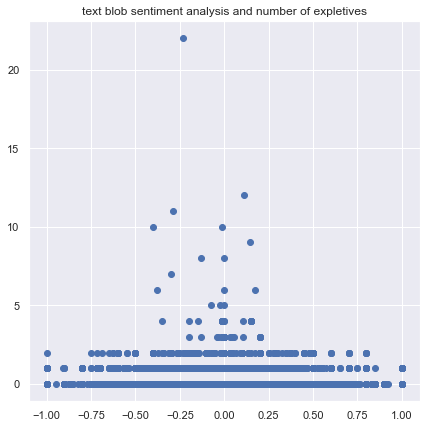

In [36]:
plt.figure(figsize=(7,7));
plt.scatter(x=df['tb_polarity'], y=df['grp_2']);
plt.title("text blob sentiment analysis and number of expletives", fontsize=12);

In [37]:
df.rename(columns = {'neg':'vader_neg','neu':'vader_neu','pos':'vader_pos'}, inplace = True)

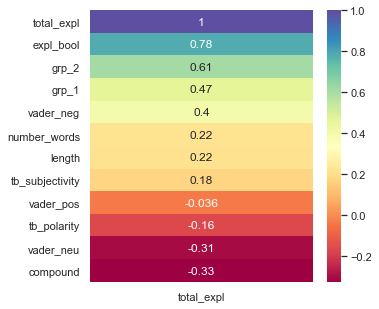

In [38]:
plt.figure(figsize=(5, 5))
plt.fontsize = 32
sns.heatmap(df.corr()[['total_expl']].sort_values('total_expl', ascending=False), 
            annot=True, cmap='Spectral', vmax=1);

This is not looking promising the best correlation is the Vader negativity analysis and even that is not impressive.
Before we move on let us visualize it:

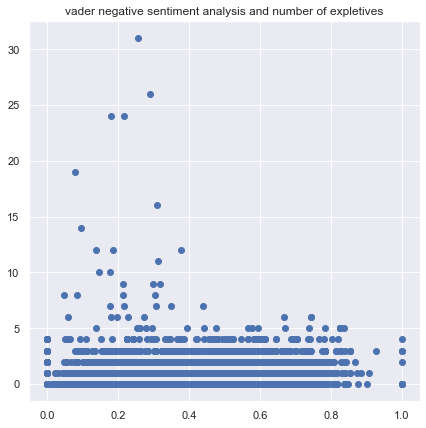

In [39]:
plt.figure(figsize=(7,7));
plt.scatter(x=df['vader_neg'], y=df['total_expl']);
plt.title("vader negative sentiment analysis and number of expletives", fontsize=12);

## Lets bring in our intial sample
that has the longer set of text it will be intersting to see how this group does in the modeling sequence and gives us insight into the text length and predictability compared to the shorter counter parts. 

In [40]:
add_on=pd.read_csv('./assets/1sample.csv')
add_on.head(1)

,artist,song,text,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
0,2pac,2ofamerikazmostwanted,up out of there aint nothin but a gangsta party eh light that up snoop why you actin like that ahh shit you done fucked up now aint nothin but a gangsta party you done put two of americas most wanted in the same motherfuckin place at the same motherfuckin time aint nothin but a gangsta party ha ha ha ha yall niggas about to feel this aint nothin but a gangsta party out the champagne glasses and the motherfuckin condoms have one on us aight aint nothin but a gangsta party a toast to the gangsters,507,97,1,5,1,1,0.016667,0.491667,0.106,0.623,0.272,0.9643


In [41]:
add_on=add_on.drop(['song'], axis=1)

In [42]:
df.shape

(124937, 14)

In [43]:
add_on.rename(columns = {'neg':'vader_neg','neu':'vader_neu','pos':'vader_pos'}, inplace = True)

In [44]:
df=pd.concat([df,add_on], ignore_index=False)

In [45]:
df.text.drop_duplicates(inplace=True)

In [112]:
from scipy.stats import ttest_ind
ttest_ind(df.number_words,df.total_expl)

Ttest_indResult(statistic=453.6588014494813, pvalue=0.0)

In [46]:
df.shape

(125219, 14)

## Export it 

We have our dataset! 
This is actually from the earlier iteration of this project where I was trying to do next word prediction with tensorflow and Keras. The idea was to export the file out as a csv with no columns and index. So essentially these produce a corpus file of lyrics. Do we need this? No, but just a nice to have if we ever want to go down that route.

This is a full kitchen sink export and for once I remembered to chop the index off

In [47]:
export=df.copy()
export.to_csv('./assets/NLP_full.csv',index=False)

These are the earlier exports.

In [48]:
cols_to_drop = ['artist',
 #'text',
 'length',
 'number_words',
 'expl_bool',
 'total_expl',
 'grp_1',
 'grp_2',
 'tb_polarity',
 'tb_subjectivity',
 'vader_neg',
 'vader_neu',
 'vader_pos',
 'compound']
for col in cols_to_drop:
    export.drop(columns=col, inplace=True)
    

export.to_csv('corpus.txt',  
          header=None,
          sep=" ", 
          escapechar=" ",
          index=False)


In [49]:
lines_per_file = 30000
smallfile = None
with open('corpus.txt') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = 'smallone.txt'.format(lineno + lines_per_file)
            smallfile = open(small_filename, "w")
        smallfile.write(line)
    if smallfile:
        smallfile.close()

## Artist Visualizations

Before we go on let us look at the artists in relation to the features we have brought in and created.

In [50]:
df.sample(1)

,artist,text,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
28570,Common,Cover your eyes as I describe a scene so violent,48,10,0,0,0,0,-0.8,1.0,0.357,0.643,0.0,-0.7177


In [51]:
artist_df=pd.get_dummies(df, columns=['artist'], prefix='', prefix_sep='')

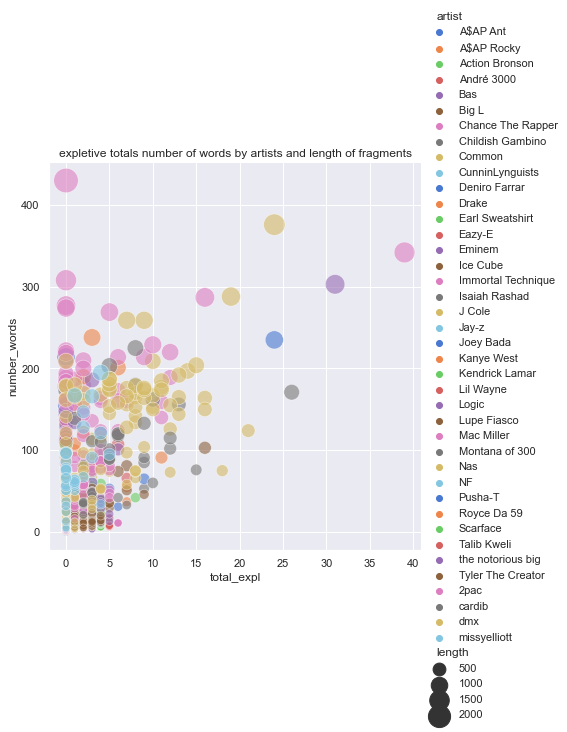

In [52]:
sns.relplot(x="total_expl", y="number_words", hue="artist", size="length",
            sizes=(60, 600), alpha=.6, palette="muted",
            height=6, data=df);
plt.title("expletive totals number of words by artists and length of fragments", fontsize=12);

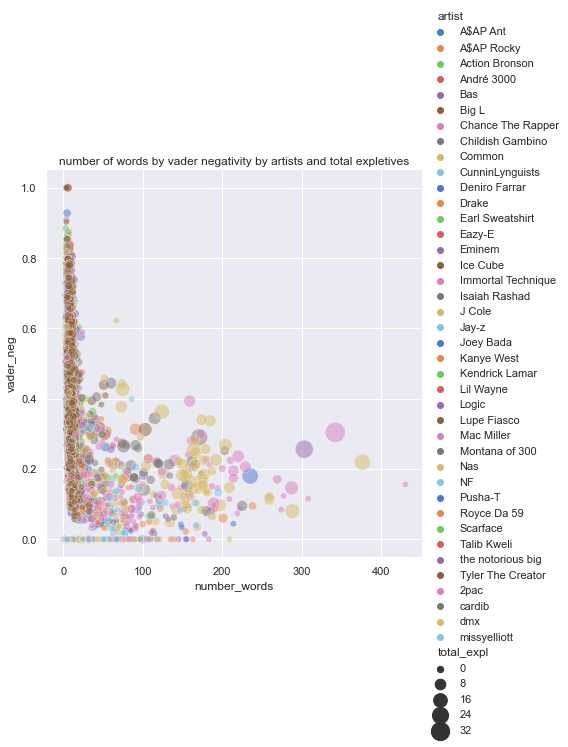

In [53]:
sns.relplot(x="number_words", y="vader_neg", hue="artist", size="total_expl",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df);
plt.title("number of words by vader negativity by artists and total expletives", fontsize=12);

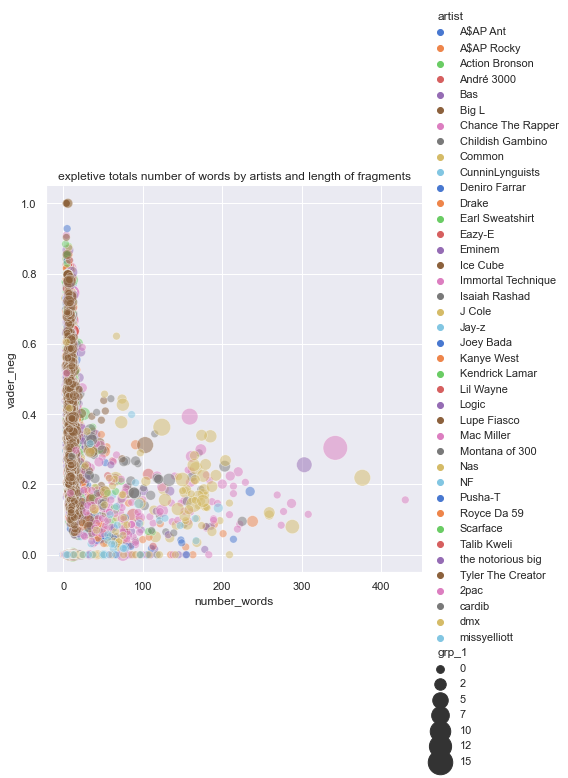

In [54]:
sns.relplot(x="number_words", y="vader_neg", hue="artist", size="grp_1",
            sizes=(60, 600), alpha=.5, palette="muted",
            height=6, data=df);
plt.title("expletive totals number of words by artists and length of fragments", fontsize=12);

In [55]:
df.artist.unique()

array(['A$AP Ant', 'A$AP Rocky', 'Action Bronson', 'André 3000', 'Bas',
       'Big L', 'Chance The Rapper', 'Childish Gambino', 'Common',
       'CunninLynguists', 'Deniro Farrar', 'Drake', 'Earl Sweatshirt',
       'Eazy-E', 'Eminem', 'Ice Cube', 'Immortal Technique',
       'Isaiah Rashad', 'J Cole', 'Jay-z', 'Joey Bada', 'Kanye West',
       'Kendrick Lamar', 'Lil Wayne', 'Logic', 'Lupe Fiasco',
       'Mac Miller', 'Montana of 300', 'Nas', 'NF', 'Pusha-T',
       'Royce Da 59', 'Scarface', 'Talib Kweli', 'the notorious big',
       'Tyler The Creator', '2pac', 'cardib', 'dmx', 'missyelliott'],
      dtype=object)

In [56]:
len(df.artist.value_counts().to_list())

40

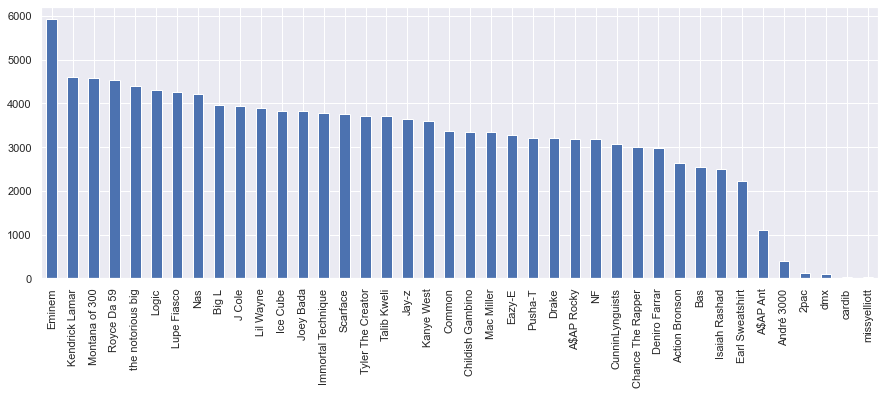

In [57]:
df.artist.value_counts().plot(kind='bar',figsize=(15, 5), label="nulls");

## Lyrical Concept Overview

Just a sampling of the frequency of certain words being used in the corpus. This gives us some insight into what we might expect once we vectorize the text.

In [58]:
df['text'].str.contains('money').value_counts()[True]

1623

In [59]:
df['text'].str.contains('prison').value_counts()[True]

131

In [60]:
df['text'].str.contains('wages').value_counts()[True]

10

In [61]:
df['text'].str.contains('minimum wage').value_counts()[True]

4

In [62]:
df['text'].str.contains('you broke').value_counts()[True]

23

In [63]:
df['text'].str.contains('paid').value_counts()[True]

214

In [64]:
df['text'].str.contains('rap').value_counts()[True]

2310

In [65]:
df['text'].str.contains('kill').value_counts()[True]

1271

In [66]:
df['text'].str.contains('murder').value_counts()[True]

317

In [67]:
df['text'].str.contains('your girl').value_counts()[True]

105

In [68]:
df['text'].str.contains('war').value_counts()[True]

865

In [69]:
df['text'].str.contains('iraq').value_counts()[True]

9

In [70]:
df['text'].str.contains('Afghanistan').value_counts()[True]

5

In [71]:
df['text'].str.contains('god').value_counts()[True]

314

In [72]:
df['text'].str.contains('capitalism').value_counts()[True]

3

In [73]:
df['text'].str.contains('sex').value_counts()[True]

249

In [74]:
df['text'].str.contains('love').value_counts()[True]

2542

In [75]:
df['text'].str.contains('crack').value_counts()[True]

404

## CountVectorizer

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [76]:
extra_stop_words=['im','know','dont','got','uh','like','yeah','aint','just','cause','want','thats','make','let','ya','yeah','yo','ay','wanna', 'huh','dmx','cardi','missy','2pac','kak','rak','pac','man','em','say','time','come','tell','right','need','way','feel','think','said','youre','look','gotta','day','gon','hit','better','baby','good','new','oh','bout','mind','did','do','ive','aaaaaaaaaaaaahhhhhhhhhhhh','aaaah']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

In [77]:
dfone=df.sample(frac = .05)

In [78]:
cvec = CountVectorizer(stop_words=stop_words)
X = dfone.text
cvec.fit(X)
text_cv = cvec.transform(df.text)
text_df = pd.DataFrame(text_cv.todense(), columns=cvec.get_feature_names())
text_df

,aaah,aali,abdomen,ability,able,aboard,abort,abortion,abracadabra,abraham,...,zeroes,zeros,zion,zippers,zirconias,zombie,zone,zonin,zoo,zooted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
text_df.sum().sort_values(ascending = False).head(5)# provides the top results

nigga     5517
shit      4885
niggas    4713
fuck      4333
bitch     3339
dtype: int64

In [80]:
text_df.sum().sort_values(ascending = False).tail(5)# provides the bottom results

bovine          1
embezzelment    1
objecting       1
offroad         1
breach          1
dtype: int64

Lets visualize the word counts:

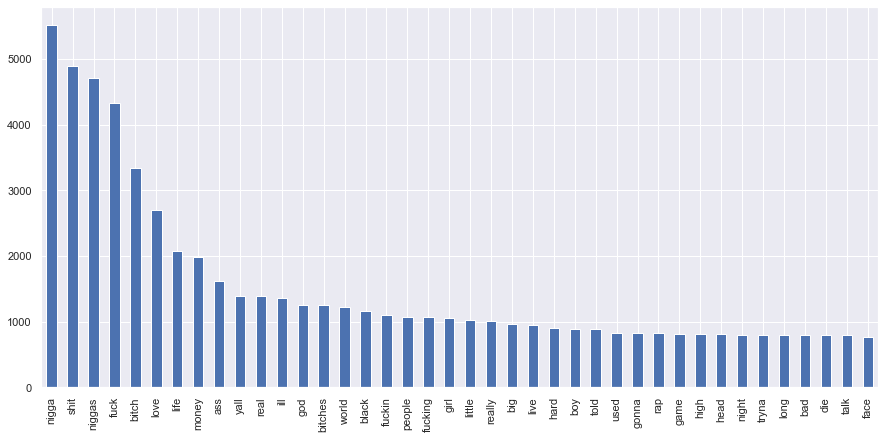

In [81]:
text_df.sum().sort_values(ascending = False).head(40).plot(kind='bar',figsize=(15,7));#visualizes it

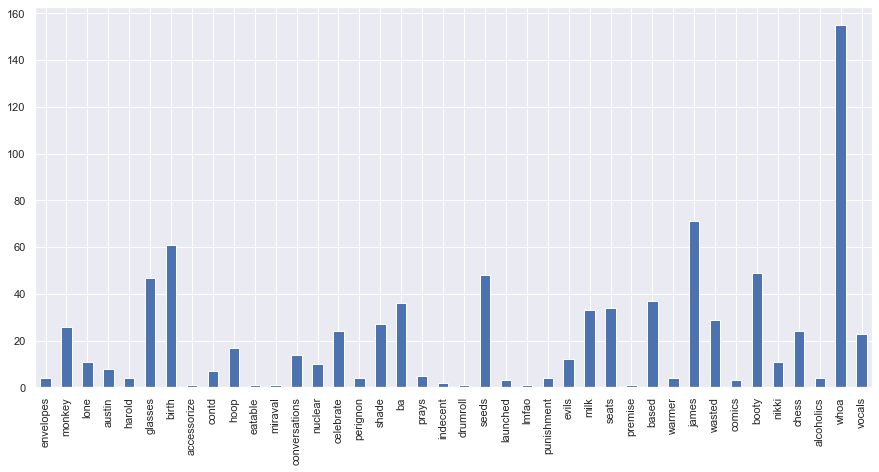

In [82]:
text_df.sum().sort_values(ascending = False).sample(40).plot(kind='bar',figsize=(15,7));#visualizes it

**Lets make some word clouds**

What should be taken away from here is not that these serve a purpose but that I was able to use PIL in conjunction with Matplot lib to make something aestheticly appealing. 

In [83]:
mpc=text_df.sum().sort_values(ascending = False).head(40).to_dict()
#most popular
lpc=text_df.sum().sort_values(ascending = False).tail(40).to_dict()
#least popular

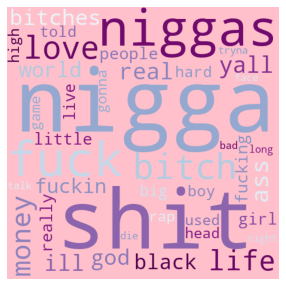

In [84]:
plt.figure( figsize=(5,5) )
plt.grid(False)
plt.axis('off')
#cleans up the word cloud
wc = WordCloud(colormap="BuPu",background_color="pink",width=500,height=500, max_words=40,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(mpc)
plt.imshow(wc);

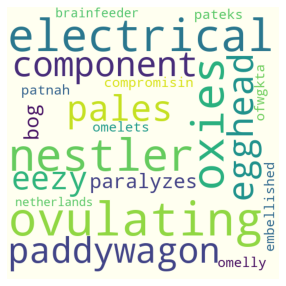

In [85]:
plt.figure( figsize=(5,5) )
plt.grid(False)
plt.axis('off')
#cleans up the word cloud
wc = WordCloud(background_color="ivory",width=500,height=500, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(lpc)
plt.imshow(wc);

# Tfidf

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. There is an essential scoring that takes place here. 

In [86]:
dftwo=df.sample(frac = .05)

In [87]:
dftwo.shape

(6261, 14)

In [88]:
tfid = TfidfVectorizer(stop_words=stop_words)
X1 = dftwo.text
tfid.fit(X)
text_tf = tfid.transform(dftwo.text)
texttf_df = pd.DataFrame(text_tf.todense(), columns=tfid.get_feature_names())
texttf_df

,aaah,aali,abdomen,ability,able,aboard,abort,abortion,abracadabra,abraham,...,zeroes,zeros,zion,zippers,zirconias,zombie,zone,zonin,zoo,zooted
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
texttf_df.sum().sort_values(ascending = False).head(5)# provides the top results

nigga     93.666894
shit      87.558333
niggas    83.946962
fuck      81.713652
bitch     70.932209
dtype: float64

In [90]:
texttf_df.sum().sort_values(ascending = False).tail(5)# provides the bottom results

masquerade    0.0
masked        0.0
mashin        0.0
maseratis     0.0
aaah          0.0
dtype: float64

Now lets visualize these again: 

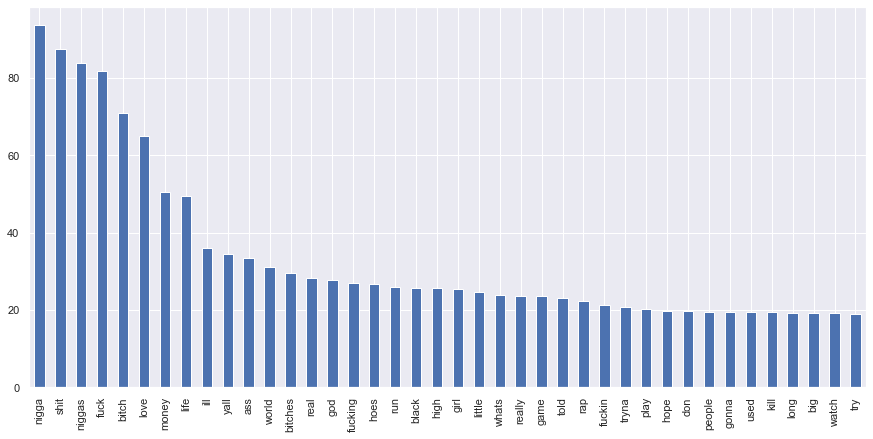

In [91]:
texttf_df.sum().sort_values(ascending = False).head(40).plot(kind='bar',figsize=(15,7));#visualizes it

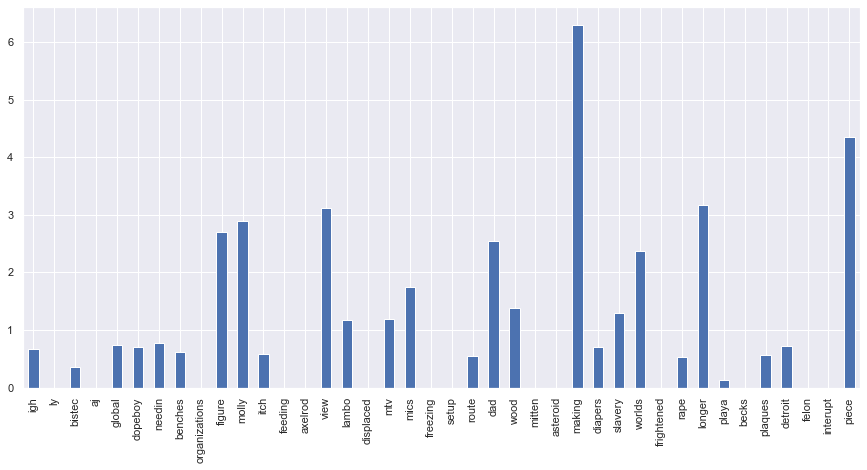

In [92]:
texttf_df.sum().sort_values(ascending = False).sample(40).plot(kind='bar',figsize=(15,7));#visualizes it

In [93]:
mpc_tf=texttf_df.sum().sort_values(ascending = False).head(40).to_dict()

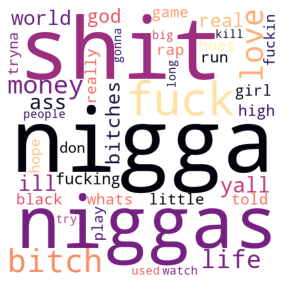

In [94]:
plt.figure( figsize=(5,5) )
plt.grid(False)
plt.axis('off')
#cleans up the word cloud
wc = WordCloud(colormap="magma",background_color="white",width=500,height=500, max_words=40,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(mpc_tf)
plt.imshow(wc);

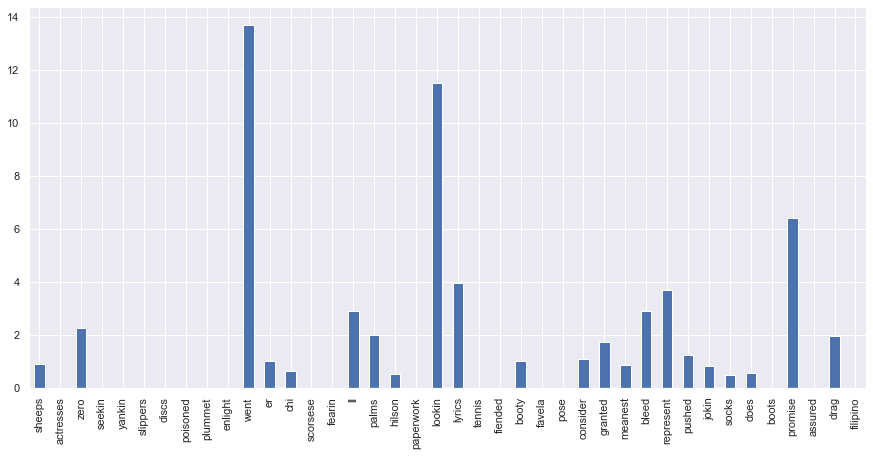

In [95]:
texttf_df.sum().sort_values(ascending = False).sample(40).plot(kind='bar',figsize=(15,7));#visualizes it

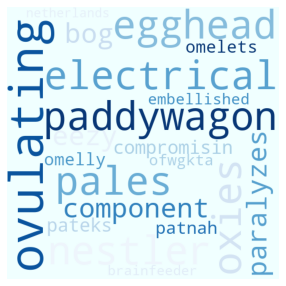

In [96]:
plt.figure( figsize=(5,5) )
plt.grid(False)
plt.axis('off')
#cleans up the word cloud
wc = WordCloud(colormap="Blues",background_color="azure",width=500,height=500, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(lpc)
plt.imshow(wc);

## Make clean word clouds 

In a salute to censorship and cultural commodification of hiphop I present censored word clouds which is a testment not only using the PIL and MatPlot lib but also the profound love I have for data scrubbing and munging. Not bad this could be in the next Wells Fargo outreach campagin. 

In [97]:
text_df.sample
clean = text_df.drop(columns=[col for col in text_df if col in expl_list])

In [98]:
clean_mpc=clean.sum().sort_values(ascending = False).head(40).to_dict()
#most popular
clean_lpc=clean.sum().sort_values(ascending = False).tail(40).to_dict()
#least popular

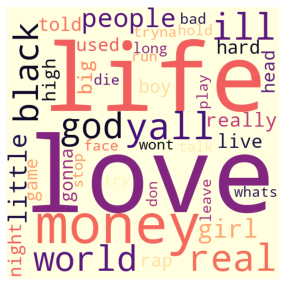

In [99]:
plt.figure( figsize=(5,5) )
plt.grid(False)
plt.axis('off')
#cleans up the word cloud
wc = WordCloud(colormap="magma",background_color="lightyellow",width=500,height=500, max_words=40,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(clean_mpc)
plt.imshow(wc);

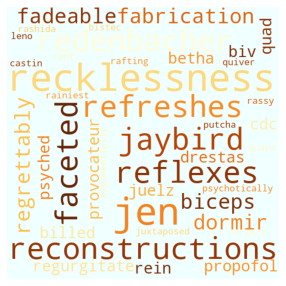

In [100]:
plt.figure( figsize=(5,5) )
plt.grid(False)
plt.axis('off')
#cleans up the word cloud
wc = WordCloud(colormap="YlOrBr",background_color="azure",width=500,height=500, max_words=40,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(clean_lpc)
plt.imshow(wc);

## Introduction to Spacy

Visualize spaCy's guess at the syntactic structure of a sentence. Arrows point from children to heads, and are labelled by their relation type. This is demonstartion puts into focus the ability for language models to deal with transcribed lyrics that often do not follow organized grammar patterns assocaited with english.

In [101]:
from spacy import displacy
nlp = spacy.load("en_core_web_lg")

In [141]:
insert_doc=df[['text']].sample(1).to_string(header=False, index_names= False)

pattern = r'[0-9]'
# Match all digits in the string and replace them by empty string
insert_doc = re.sub(pattern, '', insert_doc)
insert_doc=insert_doc.strip()
insert_doc

'THALIA What up Kai you lil bitch'

Lets observe its application on a lyric segment. 

In [144]:
doc = nlp(insert_doc)
for token in doc:
    print(token.text,token.pos_,token.lemma_)

THALIA PROPN THALIA
What PRON what
up ADP up
Kai PROPN Kai
you PRON you
lil ADJ lil
bitch NOUN bitch


In [145]:
displacy.render(doc,style = 'dep',jupyter=True)

# Conclude for post model evaluation

In [105]:
df.head(6)

,artist,text,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
3,A$AP Ant,Triple beam for the weight,26,5,0,0,0,0,0.000000,0.000000,0.00,1.000,0.000,0.0000
4,A$AP Ant,Cut the middle man tryna get white bitches,43,8,1,1,0,0,0.000000,0.000000,0.50,0.500,0.000,-0.7184
5,A$AP Ant,Snorting off the plate coke from Colombia,41,7,0,0,0,0,0.000000,0.000000,0.00,1.000,0.000,0.0000
6,A$AP Ant,Riding round in the Benz looking like a trap star,49,10,0,0,0,0,-0.200000,0.400000,0.18,0.625,0.195,0.0516
7,A$AP Ant,Flipping raw day and night,26,5,0,0,0,0,-0.230769,0.461538,0.00,1.000,0.000,0.0000
8,A$AP Ant,Tryna get my money right naw I aint living rite,47,10,0,0,0,0,0.285714,0.535714,0.00,1.000,0.000,0.0000


In [106]:
df_mean=df.groupby("artist").mean()

In [107]:
df_mean.head(5)

,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
artist,,,,,,,,,,,,
2pac,475.027027,97.135135,0.540541,2.486486,0.423423,0.981982,0.013489,0.466969,0.127459,0.747126,0.125459,-0.118820
A$AP Ant,39.019856,8.000000,0.296931,0.332130,0.050542,0.092960,0.002082,0.191279,0.127984,0.803171,0.067035,-0.099717
A$AP Rocky,45.075762,9.306507,0.326941,0.376925,0.088966,0.138950,-0.000962,0.269940,0.130029,0.777125,0.092841,-0.069523
Action Bronson,44.047130,8.853288,0.212847,0.178259,0.049411,0.003041,0.001649,0.253930,0.098463,0.805655,0.095875,-0.016337
André 3000,39.012723,8.318066,0.025445,0.007634,0.002545,0.002545,0.053356,0.244188,0.051667,0.810858,0.137501,0.110482


In [108]:
df_mean.head(5)

,length,number_words,expl_bool,total_expl,grp_1,grp_2,tb_polarity,tb_subjectivity,vader_neg,vader_neu,vader_pos,compound
artist,,,,,,,,,,,,
2pac,475.027027,97.135135,0.540541,2.486486,0.423423,0.981982,0.013489,0.466969,0.127459,0.747126,0.125459,-0.118820
A$AP Ant,39.019856,8.000000,0.296931,0.332130,0.050542,0.092960,0.002082,0.191279,0.127984,0.803171,0.067035,-0.099717
A$AP Rocky,45.075762,9.306507,0.326941,0.376925,0.088966,0.138950,-0.000962,0.269940,0.130029,0.777125,0.092841,-0.069523
Action Bronson,44.047130,8.853288,0.212847,0.178259,0.049411,0.003041,0.001649,0.253930,0.098463,0.805655,0.095875,-0.016337
André 3000,39.012723,8.318066,0.025445,0.007634,0.002545,0.002545,0.053356,0.244188,0.051667,0.810858,0.137501,0.110482


In [109]:
df_mean.to_csv('./assets/averages.csv')